In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
#Random Seed
#np.random.seed(5)

# Load the data
file_path = "Resources/alzheimers_disease_data.csv"
alzheimers_db = pd.read_csv(file_path)

# Display basic information about the DataFrame
alzheimers_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [3]:
# Display the first few rows of the DataFrame
alzheimers_db.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


# Cleaning the data

In [4]:
#Count the nulls
alzheimers_db.isnull().sum()

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

In [5]:
#Drop PatientID, DoctorInCharge from dataframe
alzheimers_db.drop(['PatientID', 'DoctorInCharge'], axis=1, inplace = True)

In [72]:
#Show descriptions of each variable (count, mean, std, min, 25%, 50%, 75%, max)
np.transpose(alzheimers_db.describe())

,count,mean,std,min,25%,50%,75%,max
Age,2149.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
Gender,2149.0,0.506282,0.500077,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2149.0,0.697534,0.996128,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,2149.0,1.286645,0.904527,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,2149.0,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
Smoking,2149.0,0.288506,0.453173,0.000000,0.000000,0.000000,1.000000,1.000000
AlcoholConsumption,2149.0,10.039442,5.757910,0.002003,5.139810,9.934412,15.157931,19.989293
PhysicalActivity,2149.0,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
DietQuality,2149.0,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346
SleepQuality,2149.0,7.051081,1.763573,4.002629,5.482997,7.115646,8.562521,9.999840


# Correlations

In [7]:
#correlation matrix
corr_matrix = alzheimers_db.corr()
corr_matrix

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
Age,1.000000,0.028708,0.027745,-0.060560,-0.015677,0.020060,0.007323,-0.010249,-0.023386,0.049139,...,0.005508,0.012343,0.038973,-0.038658,0.009002,0.027523,-0.009470,0.013900,-0.019279,-0.005488
Gender,0.028708,1.000000,-0.003660,-0.007070,0.005928,0.016650,0.004330,-0.035795,0.010942,0.007310,...,0.033324,0.003880,0.006099,0.003865,-0.030583,0.017506,0.025919,-0.001636,-0.028537,-0.020975
Ethnicity,0.027745,-0.003660,1.000000,0.026516,-0.003176,0.031485,0.008363,0.020498,-0.018184,0.029304,...,-0.004704,0.003687,-0.019363,0.010475,0.022431,-0.018132,-0.030035,0.019363,-0.034619,-0.014782
EducationLevel,-0.060560,-0.007070,0.026516,1.000000,-0.023514,-0.009904,-0.012646,-0.016703,0.017412,0.020248,...,0.020269,-0.000165,0.010473,0.031934,-0.008168,-0.017568,-0.019950,0.013033,-0.008685,-0.043966
BMI,-0.015677,0.005928,-0.003176,-0.023514,1.000000,0.020437,-0.008997,0.000742,0.019922,-0.005975,...,-0.030501,0.029293,0.035276,-0.009788,-0.015859,-0.031840,-0.015901,-0.039400,0.071131,0.026343
Smoking,0.020060,0.016650,0.031485,-0.009904,0.020437,1.000000,0.008363,0.010760,-0.002048,-0.001145,...,-0.031879,0.020339,-0.014763,-0.029233,0.004498,-0.028403,-0.009977,0.001741,0.018011,-0.004865
AlcoholConsumption,0.007323,0.004330,0.008363,-0.012646,-0.008997,0.008363,1.000000,0.021696,0.020117,-0.003873,...,-0.016483,-0.029418,0.013657,-0.008250,-0.032798,0.015521,0.019117,-0.002712,-0.024121,-0.007618
PhysicalActivity,-0.010249,-0.035795,0.020498,-0.016703,0.000742,0.010760,0.021696,1.000000,0.011085,-0.001823,...,-0.002419,0.008709,-0.014253,-0.013324,-0.009397,-0.020407,-0.013629,0.031169,0.009837,0.005945
DietQuality,-0.023386,0.010942,-0.018184,0.017412,0.019922,-0.002048,0.020117,0.011085,1.000000,0.051295,...,-0.009700,0.012537,-0.014033,-0.007888,0.002628,-0.026271,0.029087,0.045737,0.006175,0.008506
SleepQuality,0.049139,0.007310,0.029304,0.020248,-0.005975,-0.001145,-0.003873,-0.001823,0.051295,1.000000,...,0.029589,-0.016807,-0.019899,0.014535,0.013508,0.019467,-0.016892,0.011237,0.002930,-0.056548


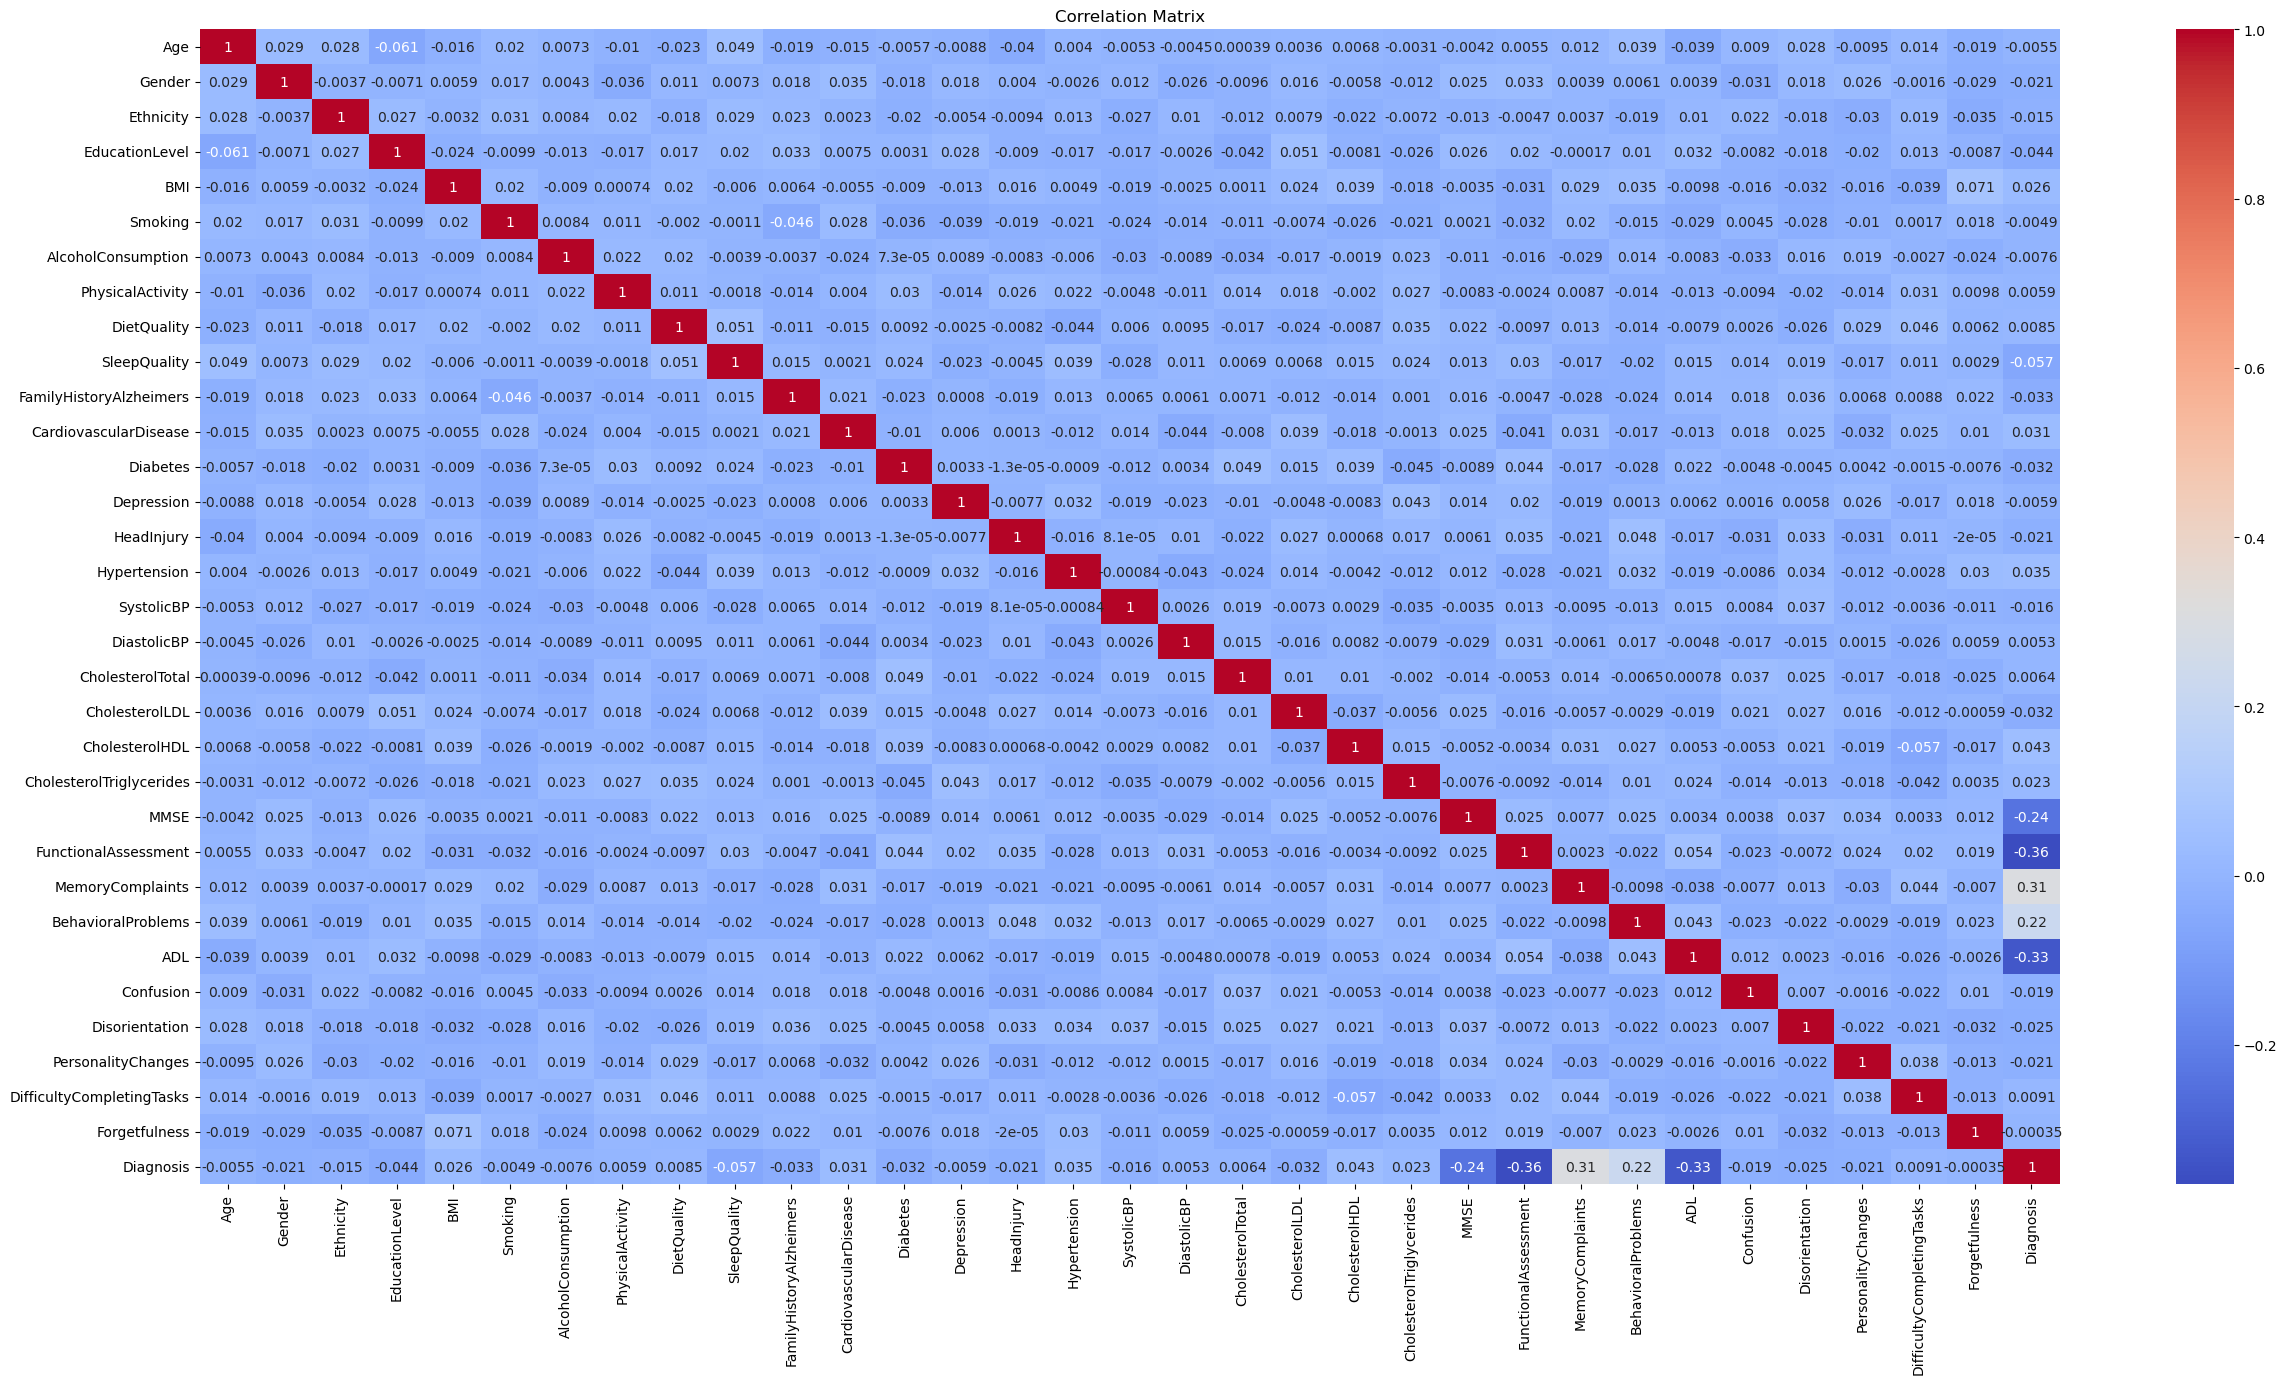

In [8]:
#show and save a heatmap of the correlation matrix
plt.figure(figsize = (30,15))
svm = sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, square=False)
plt.title('Correlation Matrix')
plt.show()
figure = svm.get_figure()
figure.savefig('Images/corr_matrix.png', dpi=400)

In [9]:
#filter the correlation matrix to only include correlations above 0.03 or below -0.03
filtered_corr_matrix = corr_matrix[(corr_matrix > 0.03) | (corr_matrix < -0.03)]
filtered_corr_matrix

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
Age,1.000000,NaN,NaN,-0.060560,NaN,NaN,NaN,NaN,NaN,0.049139,...,NaN,NaN,0.038973,-0.038658,NaN,NaN,NaN,NaN,NaN,NaN
Gender,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,-0.035795,NaN,NaN,...,0.033324,NaN,NaN,NaN,-0.030583,NaN,NaN,NaN,NaN,NaN
Ethnicity,NaN,NaN,1.000000,NaN,NaN,0.031485,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.030035,NaN,-0.034619,NaN
EducationLevel,-0.060560,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.031934,NaN,NaN,NaN,NaN,NaN,-0.043966
BMI,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,-0.030501,NaN,0.035276,NaN,NaN,-0.031840,NaN,-0.039400,0.071131,NaN
Smoking,NaN,NaN,0.031485,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,-0.031879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AlcoholConsumption,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.032798,NaN,NaN,NaN,NaN,NaN
PhysicalActivity,NaN,-0.035795,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.031169,NaN,NaN
DietQuality,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.051295,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.045737,NaN,NaN
SleepQuality,0.049139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.051295,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.056548


# Looking at most correlated features with Diagnosis

In [10]:
#get an array of the features that are correlated with Diagnosis and their correlations
corr_diagnosis = corr_matrix["Diagnosis"].reset_index()

#rename the columns of the array to Feature and Correlation
corr_diagnosis.columns = ['Feature', 'Correlation']

#filter the array to only 'Correlations' that are > 0.03 and < -0.03
filtered_corr_diagnosis = corr_diagnosis[(corr_diagnosis['Correlation'] > 0.03) | (corr_diagnosis['Correlation'] < -0.03)]

#filter the array to make sure 'Diagnosis' is not one of the features (of course it's correlated with itself)
filtered_corr_diagnosis = filtered_corr_diagnosis [filtered_corr_diagnosis['Feature'] != 'Diagnosis']

#sort the array in descending order to include the highest positive correlations first
sorted_corr_diagnosis = filtered_corr_diagnosis.sort_values(by= 'Correlation', ascending=False)
sorted_corr_diagnosis

,Feature,Correlation
24,MemoryComplaints,0.306742
25,BehavioralProblems,0.224350
20,CholesterolHDL,0.042584
15,Hypertension,0.035080
11,CardiovascularDisease,0.031490
12,Diabetes,-0.031508
19,CholesterolLDL,-0.031976
10,FamilyHistoryAlzheimers,-0.032900
3,EducationLevel,-0.043966
9,SleepQuality,-0.056548


AttributeError: module 'matplotlib.pyplot' has no attribute 'set_xticklabels'

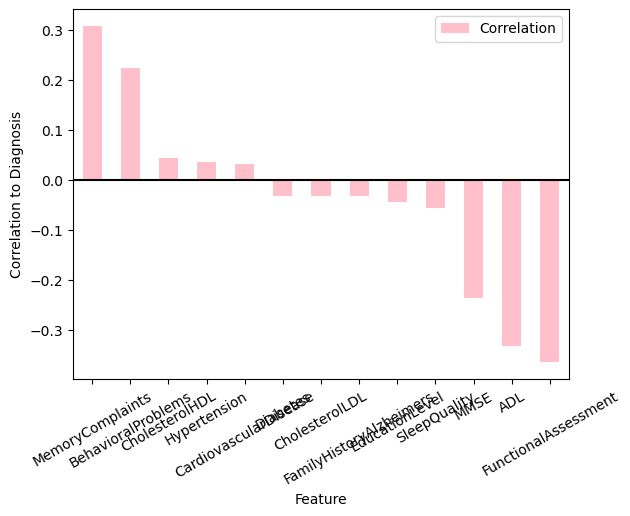

In [71]:
sorted_corr_diagnosis.set_index('Feature').plot(kind='bar', color='pink')
plt.axhline(0, color='k')
plt.ylabel('Correlation to Diagnosis')
plt.xticks(rotation=30)
plt.set_xticklabels(rotation=45)
plt.show()

In [11]:
# Converting MMSE, FunctionalAssessment and ADL to Integers and Rounding
#alzheimers_db_transformed = alzheimers_db
#alzheimers_db_transformed["MMSE"] = alzheimers_db_transformed["MMSE"].round().astype(int)
#alzheimers_db_transformed["FunctionalAssessment"] = alzheimers_db_transformed["FunctionalAssessment"].round().astype(int)
#alzheimers_db_transformed["ADL"] = alzheimers_db_transformed["ADL"].round().astype(int)
#alzheimers_db_transformed

In [12]:
#separating categorical and continuous variables
categorical_variables = alzheimers_db[["Smoking","FamilyHistoryAlzheimers", "CardiovascularDisease","Diabetes","Depression","HeadInjury","Hypertension","MemoryComplaints", "BehavioralProblems", "Confusion", "Disorientation", "PersonalityChanges", "DifficultyCompletingTasks","Forgetfulness", "Diagnosis"]]
continuous_variables = alzheimers_db[["Age","BMI","AlcoholConsumption","PhysicalActivity","DietQuality","SleepQuality","SystolicBP", "DiastolicBP","CholesterolTotal","CholesterolLDL","CholesterolHDL", "CholesterolTriglycerides","MMSE","FunctionalAssessment","ADL"]]
diagnosis = alzheimers_db["Diagnosis"]


In [13]:
def chi_square_test(dataframe, target_var, other_var):
    #create contingency table
    contingency_table = pd.crosstab(dataframe[target_var], dataframe[other_var])
    #perform Chi-Square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    return chi2, p, dof, expected, contingency_table

In [14]:
#specify the target variable
target_variable = 'Diagnosis'

#list all other variables except Diagnosis
other_variables = categorical_variables.columns.difference(['Diagnosis'])

#Initialize results into a list
results = []

#Perform chi-square test for each variable against the target variable
for other_var in other_variables:

        chi2, p, dof, expected, table = chi_square_test(categorical_variables, target_variable, other_var)

        results.append({
            'Other Variable': other_var,
            'Chi2 Statistic': chi2,
            'P-Value': p,
            'Degrees of Freedom': dof,
            'Contingency Table': table,
            'Expected Frequencies': expected
        })
#convert results to dataframe
results_df = pd.DataFrame(results)
results_df

,Other Variable,Chi2 Statistic,P-Value,Degrees of Freedom,Contingency Table,Expected Frequencies
0,BehavioralProblems,106.879217,4.731447e-25,1,BehavioralProblems 0 1 Diagnosis ...,"[[1171.181014425314, 217.8189855746859], [640...."
1,CardiovascularDisease,1.947683,1.628367e-01,1,CardiovascularDisease 0 1 Diagnosis ...,"[[1188.6323871568172, 200.36761284318288], [65..."
2,Confusion,0.694786,4.045414e-01,1,Confusion 0 1 Diagnosis 0 ...,"[[1103.9609120521172, 285.03908794788276], [60..."
3,Depression,0.047019,8.283335e-01,1,Depression 0 1 Diagnosis 0 ...,"[[1110.4243834341555, 278.5756165658446], [607..."
4,Diabetes,1.953177,1.622450e-01,1,Diabetes 0 1 Diagnosis 0 ...,"[[1179.5835272219638, 209.4164727780363], [645..."
5,DifficultyCompletingTasks,0.128631,7.198557e-01,1,DifficultyCompletingTasks 0 1 Diagnosis...,"[[1168.5956258724989, 220.40437412750117], [63..."
6,Disorientation,1.168140,2.797838e-01,1,Disorientation 0 1 Diagnosis ...,"[[1169.2419730107026, 219.75802698929735], [63..."
7,FamilyHistoryAlzheimers,2.170309,1.406980e-01,1,FamilyHistoryAlzheimers 0 1 Diagnosis ...,"[[1038.6798510935319, 350.32014890646815], [56..."
8,Forgetfulness,0.000000,1.000000e+00,1,Forgetfulness 0 1 Diagnosis ...,"[[970.1670544439274, 418.8329455560726], [530...."
9,HeadInjury,0.836768,3.603227e-01,1,HeadInjury 0 1 Diagnosis 0 ...,"[[1260.3769194974407, 128.62308050255933], [68..."


In [15]:
#save results to csv to view p value in non-scientific figures
results_df.to_csv('Images/Chi2.csv')

# Splitting and Scaling the Data

In [16]:
#Initialize X and y
X = alzheimers_db.drop(columns="Diagnosis")
y = alzheimers_db["Diagnosis"]
#Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 5)
X_train.shape

(1719, 32)

In [17]:
y_train.shape

(1719,)

In [18]:
#Scale the features
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Decision Tree Classifier

In [19]:
#Create the decision tree classifier
dt = tree.DecisionTreeClassifier(random_state=5)
#Fit the model
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=5)

In [20]:
#Make predictions using the testing data
dt_predictions = dt.predict(X_test_scaled)

In [21]:
#Calculating the confusion matrix and creating a df of the confusion matrix
cm_dt = confusion_matrix(y_test, dt_predictions)
cm_df_dt = pd.DataFrame(
    cm_dt, index=["Actual 0", "Actual 1"], columns = ["Predicted 0", "Predicted 1"]
)
#Calculating the accuracy score
acc_score_dt = accuracy_score(y_test, dt_predictions)

In [22]:
#display the results of the model evaluation
display(cm_df_dt)
print(f"Accuracy Score: {acc_score_dt}")
print(classification_report(y_test, dt_predictions))

,Predicted 0,Predicted 1
Actual 0,252,32
Actual 1,16,130


Accuracy Score: 0.8883720930232558
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       284
           1       0.80      0.89      0.84       146

    accuracy                           0.89       430
   macro avg       0.87      0.89      0.88       430
weighted avg       0.89      0.89      0.89       430



# Random Forest Classifier

In [23]:
#Create a random forest classifier
rf = RandomForestClassifier(n_estimators=500, random_state = 5)
#Fit the model
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=500, random_state=5)

In [24]:
#Make predictions using the testing data
rf_predictions = rf.predict(X_test_scaled)

In [25]:
#Calculating the confusion matrix and creating a df of the confusion matrix
cm = confusion_matrix(y_test, rf_predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns = ["Predicted 0", "Predicted 1"]
)
#Calculating the accuracy score
acc_score = accuracy_score(y_test, rf_predictions)

In [26]:
#display the results of the model evaluation
display(cm_df)
print(f"Accuracy Score: {acc_score}")
print(classification_report(y_test, rf_predictions))

,Predicted 0,Predicted 1
Actual 0,275,9
Actual 1,14,132


Accuracy Score: 0.9465116279069767
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       284
           1       0.94      0.90      0.92       146

    accuracy                           0.95       430
   macro avg       0.94      0.94      0.94       430
weighted avg       0.95      0.95      0.95       430



# Gradient Boosting Classifier

In [27]:
#Create a Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state = 5)
#Fit the model
gbc.fit(X_train_scaled, y_train)

GradientBoostingClassifier(random_state=5)

In [28]:
#Make predictions using the testing data
gbc_predictions = gbc.predict(X_test_scaled)

In [29]:
#Calculating the confusion matrix and creating a df of the confusion matrix
cm_gbc = confusion_matrix(y_test, gbc_predictions)
cm_df_gbc = pd.DataFrame(
    cm_gbc, index=["Actual 0", "Actual 1"], columns = ["Predicted 0", "Predicted 1"]
)
#Calculating the accuracy score
acc_score_gbc = accuracy_score(y_test, gbc_predictions)

In [30]:
#display the results of the model evaluation
display(cm_df_gbc)
print(f"Accuracy Score: {acc_score_gbc}")
print(classification_report(y_test, gbc_predictions))

,Predicted 0,Predicted 1
Actual 0,273,11
Actual 1,8,138


Accuracy Score: 0.9558139534883721
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       284
           1       0.93      0.95      0.94       146

    accuracy                           0.96       430
   macro avg       0.95      0.95      0.95       430
weighted avg       0.96      0.96      0.96       430



# XG Boost Classifier

In [31]:
#Create an XGBoost Classifier
xgb = XGBClassifier(random_state=5)
#Fit the model
xgb.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=5, ...)

In [32]:
#Make predictions using the testing data
xgb_predictions = xgb.predict(X_test_scaled)

In [33]:
#Calculating the confusion matrix and creating a df of the confusion matrix
cm_xgb = confusion_matrix(y_test, xgb_predictions)
cm_df_xgb = pd.DataFrame(
    cm_xgb, index=["Actual 0", "Actual 1"], columns = ["Predicted 0", "Predicted 1"]
)
#Calculating the accuracy score
acc_score_xgb = accuracy_score(y_test, xgb_predictions)

In [34]:
#display the results of the model evaluation
display(cm_df_xgb)
print(f"Accuracy Score: {acc_score_xgb}")
print(classification_report(y_test, xgb_predictions))

,Predicted 0,Predicted 1
Actual 0,274,10
Actual 1,12,134


Accuracy Score: 0.9488372093023256
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       284
           1       0.93      0.92      0.92       146

    accuracy                           0.95       430
   macro avg       0.94      0.94      0.94       430
weighted avg       0.95      0.95      0.95       430



# Cat Boost

In [35]:
#Create a Cat Boost Classifier
cat = CatBoostClassifier(random_state = 5)
#Fit the model
cat.fit(X_train_scaled, y_train)

Learning rate set to 0.012984
0:	learn: 0.6790175	total: 146ms	remaining: 2m 26s
1:	learn: 0.6655511	total: 150ms	remaining: 1m 14s
2:	learn: 0.6501307	total: 153ms	remaining: 50.8s
3:	learn: 0.6336931	total: 156ms	remaining: 38.9s
4:	learn: 0.6201959	total: 160ms	remaining: 31.8s
5:	learn: 0.6061909	total: 163ms	remaining: 27s
6:	learn: 0.5918883	total: 167ms	remaining: 23.7s
7:	learn: 0.5781312	total: 170ms	remaining: 21.1s
8:	learn: 0.5655727	total: 175ms	remaining: 19.3s
9:	learn: 0.5525460	total: 180ms	remaining: 17.8s
10:	learn: 0.5406628	total: 185ms	remaining: 16.6s
11:	learn: 0.5296094	total: 189ms	remaining: 15.6s
12:	learn: 0.5178920	total: 193ms	remaining: 14.7s
13:	learn: 0.5064713	total: 197ms	remaining: 13.9s
14:	learn: 0.4954920	total: 202ms	remaining: 13.2s
15:	learn: 0.4842633	total: 206ms	remaining: 12.6s
16:	learn: 0.4740133	total: 210ms	remaining: 12.1s
17:	learn: 0.4645550	total: 214ms	remaining: 11.6s
18:	learn: 0.4551846	total: 218ms	remaining: 11.2s
19:	learn: 

In [36]:
cat_predictions = cat.predict(X_test_scaled)

In [37]:
#Calculating the confusion matrix and creating a df of the confusion matrix
cm_cat = confusion_matrix(y_test, cat_predictions)
cm_df_cat = pd.DataFrame(
    cm_cat, index=["Actual 0", "Actual 1"], columns = ["Predicted 0", "Predicted 1"]
)
#Calculating the accuracy score
acc_score_cat = accuracy_score(y_test, cat_predictions)

In [38]:
#display the results of the model evaluation
display(cm_df_cat)
print(f"Accuracy Score: {acc_score_cat}")
print(classification_report(y_test, cat_predictions))

,Predicted 0,Predicted 1
Actual 0,275,9
Actual 1,9,137


Accuracy Score: 0.958139534883721
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       284
           1       0.94      0.94      0.94       146

    accuracy                           0.96       430
   macro avg       0.95      0.95      0.95       430
weighted avg       0.96      0.96      0.96       430



# Feature Importances from Random Forest

In [39]:
# Calculate feature importance using random forest
importances = rf.feature_importances_
# Sort the features by their importance
sorted(zip(rf.feature_importances_, X.columns), reverse=True)

[(0.17706063740397238, 'FunctionalAssessment'),
 (0.16614549617787702, 'ADL'),
 (0.12231880209709044, 'MMSE'),
 (0.08181398996928152, 'MemoryComplaints'),
 (0.050076189975867796, 'BehavioralProblems'),
 (0.03110237900071524, 'PhysicalActivity'),
 (0.030907673390034963, 'DietQuality'),
 (0.030600800515642866, 'CholesterolTriglycerides'),
 (0.029795064192817005, 'SleepQuality'),
 (0.029450435872936435, 'BMI'),
 (0.029322375826699408, 'AlcoholConsumption'),
 (0.02929981595052445, 'CholesterolTotal'),
 (0.02841498317817054, 'CholesterolHDL'),
 (0.02834838725578488, 'CholesterolLDL'),
 (0.024714739084073532, 'SystolicBP'),
 (0.024359194283821488, 'Age'),
 (0.023810450157280328, 'DiastolicBP'),
 (0.010202396664329502, 'EducationLevel'),
 (0.007770049628411689, 'Ethnicity'),
 (0.004196016919128387, 'Gender'),
 (0.003764809874157209, 'FamilyHistoryAlzheimers'),
 (0.0037599544369300436, 'Hypertension'),
 (0.0037159381906625975, 'Smoking'),
 (0.0036750642437936042, 'CardiovascularDisease'),
 (0.

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

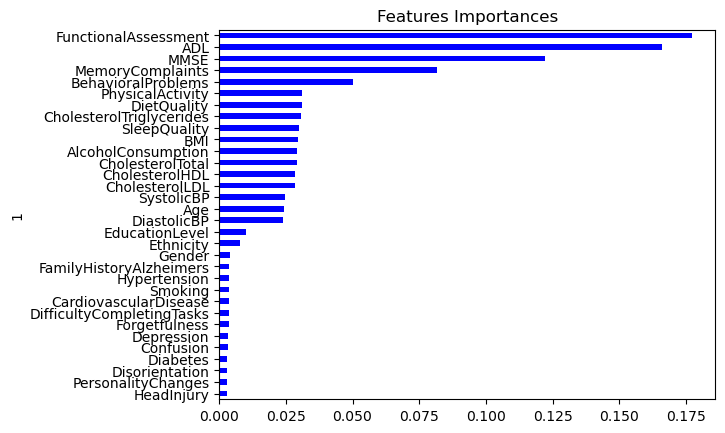

In [40]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='blue', title= 'Features Importances', legend=False)

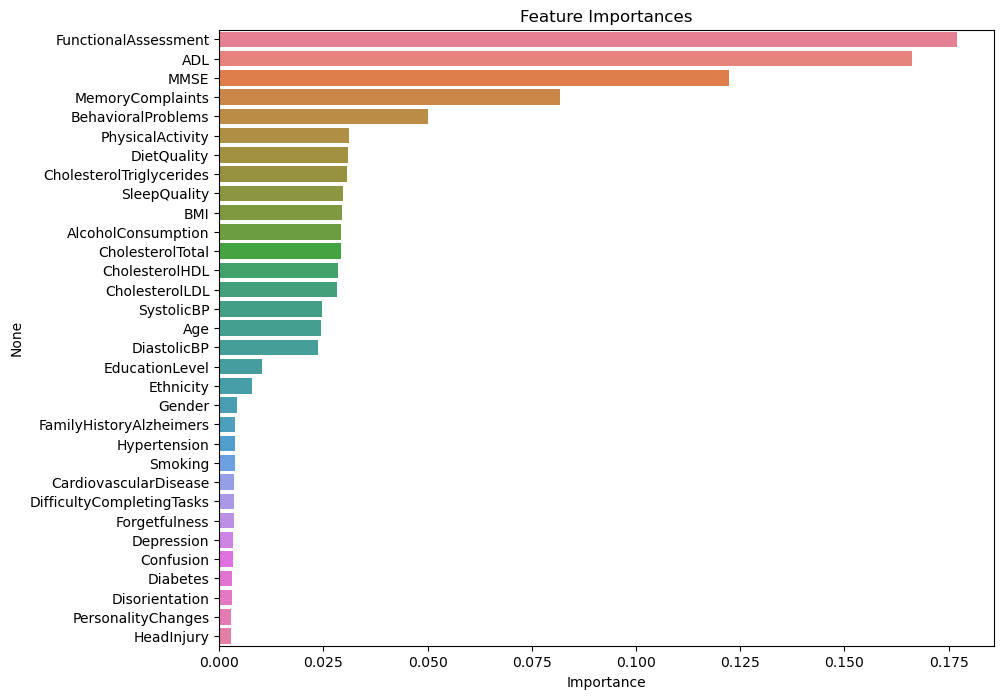

In [41]:
#Visualize the feature importances with seaborn
feature_importances = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['Importance']).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y=feature_importances.index, data=feature_importances, hue=feature_importances.index)
plt.title('Feature Importances')
plt.show()

# Re-split and Scale the Data for Top 10 Feature Importances

In [42]:
#get the top 10 in the feature importances as a list
top_10 = feature_importances.index.to_list()[:10]

#top 10 features df
Xtop10 = alzheimers_db[top_10]

#re-do train-test split with top 10 features df
X_train_top10, X_test_top10, y_train, y_test = train_test_split(Xtop10, y, test_size=0.2, random_state = 5)
X_train_top10.shape

(1719, 10)

In [43]:
#Scale the features
scaler = StandardScaler()
X_scaler_top10 = scaler.fit(X_train_top10)
X_train_scaled_top10 = X_scaler_top10.transform(X_train_top10)
X_test_scaled_top10 = X_scaler_top10.transform(X_test_top10)

# Random Forest Classifier with Top 10 Features

In [44]:
#Create a random forest classifier
rf_top10 = RandomForestClassifier(n_estimators = 500, random_state = 5)
#Fit the model
rf_top10.fit(X_train_scaled_top10, y_train)

RandomForestClassifier(n_estimators=500, random_state=5)

In [45]:
#Make predictions using the testing data
rf_predictions_top10 = rf_top10.predict(X_test_scaled_top10)

In [46]:
#Calculating the confusion matrix and creating a df of the confusion matrix
cm_top10 = confusion_matrix(y_test, rf_predictions_top10)
cm_df_top10 = pd.DataFrame(
    cm_top10, index=["Actual 0", "Actual 1"], columns = ["Predicted 0", "Predicted 1"]
)
#Calculating the accuracy score
acc_score_top10 = accuracy_score(y_test, rf_predictions_top10)

In [47]:
#display the results of the model evaluation
display(cm_df_top10)
print(f"Accuracy Score: {acc_score_top10}")
print(classification_report(y_test, rf_predictions_top10))

,Predicted 0,Predicted 1
Actual 0,274,10
Actual 1,11,135


Accuracy Score: 0.9511627906976744
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       284
           1       0.93      0.92      0.93       146

    accuracy                           0.95       430
   macro avg       0.95      0.94      0.95       430
weighted avg       0.95      0.95      0.95       430



# Gradient Boosting Classifier with Top 10 Features

In [48]:
#Create a Gradient Boosting Classifier
gbc_top10 = GradientBoostingClassifier(random_state = 5)
#Fit the model
gbc_top10.fit(X_train_scaled_top10, y_train)

GradientBoostingClassifier(random_state=5)

In [49]:
#Make predictions using the testing data
gbc_predictions_top10 = gbc_top10.predict(X_test_scaled_top10)

In [50]:
#Calculating the confusion matrix and creating a df of the confusion matrix
cm_gbc_top10 = confusion_matrix(y_test, gbc_predictions_top10)
cm_df_gbc_top10 = pd.DataFrame(
    cm_gbc_top10, index=["Actual 0", "Actual 1"], columns = ["Predicted 0", "Predicted 1"]
)
#Calculating the accuracy score
acc_score_gbc_top10 = accuracy_score(y_test, gbc_predictions_top10)

In [51]:
#display the results of the model evaluation
display(cm_df_gbc_top10)
print(f"Accuracy Score: {acc_score_gbc_top10}")
print(classification_report(y_test, gbc_predictions_top10))

,Predicted 0,Predicted 1
Actual 0,273,11
Actual 1,10,136


Accuracy Score: 0.9511627906976744
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       284
           1       0.93      0.93      0.93       146

    accuracy                           0.95       430
   macro avg       0.94      0.95      0.95       430
weighted avg       0.95      0.95      0.95       430



# XG Boost Classifier with Top 10 Features

In [52]:
#Create an XGBoost Classifier
xgb_top10 = XGBClassifier(random_state=5)
#Fit the model
xgb_top10.fit(X_train_scaled_top10, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=5, ...)

In [53]:
#Make predictions using the testing data
xgb_predictions_top10 = xgb_top10.predict(X_test_scaled_top10)

In [54]:
#Calculating the confusion matrix and creating a df of the confusion matrix
cm_xgb_top10 = confusion_matrix(y_test, xgb_predictions_top10)
cm_df_xgb_top10 = pd.DataFrame(
    cm_xgb_top10, index=["Actual 0", "Actual 1"], columns = ["Predicted 0", "Predicted 1"]
)
#Calculating the accuracy score
acc_score_xgb_top10 = accuracy_score(y_test, xgb_predictions_top10)

In [55]:
#display the results of the model evaluation
display(cm_df_xgb_top10)
print(f"Accuracy Score: {acc_score_xgb_top10}")
print(classification_report(y_test, xgb_predictions_top10))

,Predicted 0,Predicted 1
Actual 0,275,9
Actual 1,15,131


Accuracy Score: 0.9441860465116279
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       284
           1       0.94      0.90      0.92       146

    accuracy                           0.94       430
   macro avg       0.94      0.93      0.94       430
weighted avg       0.94      0.94      0.94       430



# Cat Boost Classifier with Top 10 Features

In [56]:
#Create a Cat Boost Classifier
cat_top10 = CatBoostClassifier(random_state = 5)
#Fit the model
cat_top10.fit(X_train_scaled_top10, y_train)

Learning rate set to 0.012984
0:	learn: 0.6758825	total: 4.14ms	remaining: 4.13s
1:	learn: 0.6605624	total: 7.78ms	remaining: 3.88s
2:	learn: 0.6453882	total: 11ms	remaining: 3.64s
3:	learn: 0.6304764	total: 14.4ms	remaining: 3.59s
4:	learn: 0.6170554	total: 18.7ms	remaining: 3.72s
5:	learn: 0.6023232	total: 21.9ms	remaining: 3.63s
6:	learn: 0.5882364	total: 25.8ms	remaining: 3.65s
7:	learn: 0.5746733	total: 29ms	remaining: 3.59s
8:	learn: 0.5623449	total: 33.3ms	remaining: 3.67s
9:	learn: 0.5503461	total: 36.5ms	remaining: 3.62s
10:	learn: 0.5383300	total: 39.8ms	remaining: 3.58s
11:	learn: 0.5274342	total: 42.9ms	remaining: 3.53s
12:	learn: 0.5153872	total: 46.6ms	remaining: 3.54s
13:	learn: 0.5053382	total: 49.7ms	remaining: 3.5s
14:	learn: 0.4945283	total: 53.3ms	remaining: 3.5s
15:	learn: 0.4846534	total: 56.7ms	remaining: 3.48s
16:	learn: 0.4748368	total: 60.2ms	remaining: 3.48s
17:	learn: 0.4643931	total: 63.6ms	remaining: 3.47s
18:	learn: 0.4542802	total: 69.4ms	remaining: 3.58

In [57]:
cat_predictions_top10 = cat_top10.predict(X_test_scaled_top10)

In [58]:
#Calculating the confusion matrix and creating a df of the confusion matrix
cm_cat_top10 = confusion_matrix(y_test, cat_predictions_top10)
cm_df_cat_top10 = pd.DataFrame(
    cm_cat_top10, index=["Actual 0", "Actual 1"], columns = ["Predicted 0", "Predicted 1"]
)
#Calculating the accuracy score
acc_score_cat_top10 = accuracy_score(y_test, cat_predictions_top10)

In [59]:
#display the results of the model evaluation
display(cm_df_cat_top10)
print(f"Accuracy Score: {acc_score_cat_top10}")
print(classification_report(y_test, cat_predictions_top10))

,Predicted 0,Predicted 1
Actual 0,275,9
Actual 1,11,135


Accuracy Score: 0.9534883720930233
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       284
           1       0.94      0.92      0.93       146

    accuracy                           0.95       430
   macro avg       0.95      0.95      0.95       430
weighted avg       0.95      0.95      0.95       430



# ALL FEATURES <br/>
# Print confusion matrix, accuracy scores and classification report

Learning rate set to 0.012984
0:	learn: 0.6790175	total: 4.94ms	remaining: 4.93s
1:	learn: 0.6655511	total: 9.23ms	remaining: 4.61s
2:	learn: 0.6501307	total: 13.9ms	remaining: 4.62s
3:	learn: 0.6336931	total: 18.8ms	remaining: 4.68s
4:	learn: 0.6201959	total: 22.9ms	remaining: 4.57s
5:	learn: 0.6061909	total: 27.2ms	remaining: 4.5s
6:	learn: 0.5918883	total: 32.2ms	remaining: 4.57s
7:	learn: 0.5781312	total: 36.6ms	remaining: 4.54s
8:	learn: 0.5655727	total: 42.1ms	remaining: 4.64s
9:	learn: 0.5525460	total: 47.6ms	remaining: 4.71s
10:	learn: 0.5406628	total: 52.4ms	remaining: 4.71s
11:	learn: 0.5296094	total: 57.7ms	remaining: 4.75s
12:	learn: 0.5178920	total: 67.2ms	remaining: 5.1s
13:	learn: 0.5064713	total: 73ms	remaining: 5.14s
14:	learn: 0.4954920	total: 79.3ms	remaining: 5.21s
15:	learn: 0.4842633	total: 83.7ms	remaining: 5.15s
16:	learn: 0.4740133	total: 89.6ms	remaining: 5.18s
17:	learn: 0.4645550	total: 95.1ms	remaining: 5.19s
18:	learn: 0.4551846	total: 101ms	remaining: 5.2

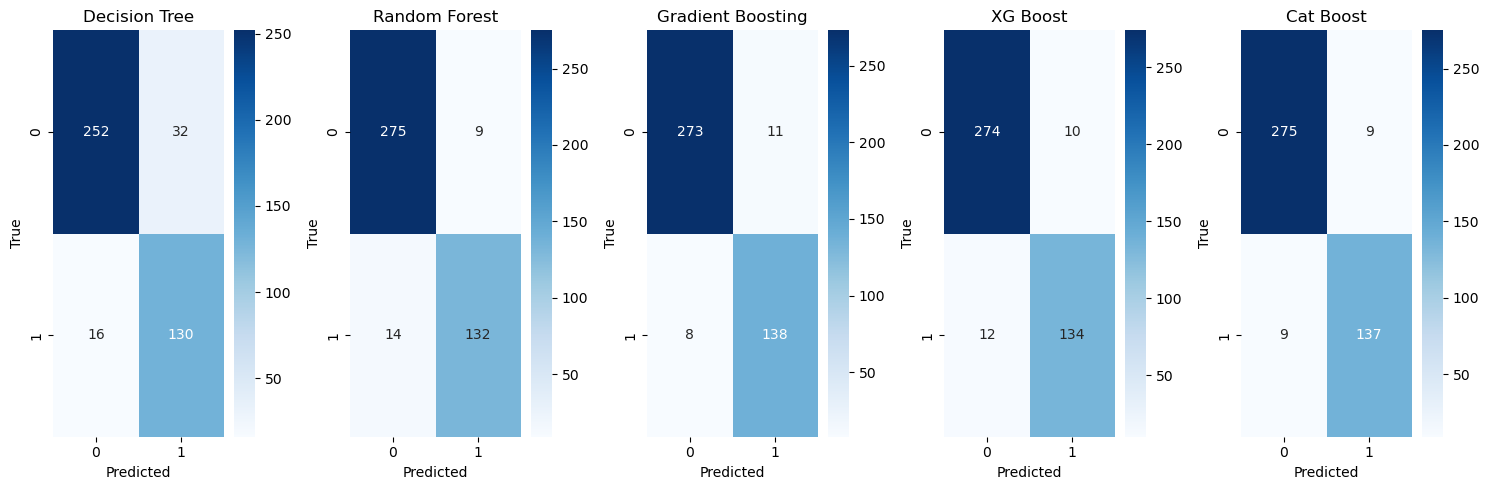

Accuracy Scores:
                Model  Accuracy
0      Decision Tree  0.888372
1      Random Forest  0.946512
2  Gradient Boosting  0.955814
3           XG Boost  0.948837
4          Cat Boost  0.958140

Classification Report for Decision Tree:

              precision    recall  f1-score     support
0              0.940299  0.887324  0.913043  284.000000
1              0.802469  0.890411  0.844156  146.000000
accuracy       0.888372  0.888372  0.888372    0.888372
macro avg      0.871384  0.888867  0.878600  430.000000
weighted avg   0.893501  0.888372  0.889654  430.000000

Classification Report for Random Forest:

              precision    recall  f1-score     support
0              0.951557  0.968310  0.959860  284.000000
1              0.936170  0.904110  0.919861  146.000000
accuracy       0.946512  0.946512  0.946512    0.946512
macro avg      0.943864  0.936210  0.939861  430.000000
weighted avg   0.946333  0.946512  0.946279  430.000000

Classification Report for Gradient Bo

In [60]:
#ALL FEATURES
# Initialize models
models = {
    "Decision Tree": tree.DecisionTreeClassifier(random_state=5),
    "Random Forest": RandomForestClassifier(n_estimators = 500, random_state=5),
    "Gradient Boosting": GradientBoostingClassifier(random_state=5),
    "XG Boost": XGBClassifier(random_state=5),
    "Cat Boost": CatBoostClassifier(random_state=5)
}

# Create dictionaries to store metrics
confusion_matrices = {}
accuracy_scores = {}
classification_reports = {}

for name, model in models.items():
    # Fit model
    model.fit(X_train_scaled, y_train)
    
    # Predict
    y_pred = model.predict(X_test_scaled)
    
    # Compute metrics
    confusion_matrices[name] = confusion_matrix(y_test, y_pred)
    accuracy_scores[name] = accuracy_score(y_test, y_pred)
    classification_reports[name] = classification_report(y_test, y_pred, output_dict=True)

# Plot confusion matrices
fig, axes = plt.subplots(1, len(models), figsize=(15, 5))
for ax, (name, cm) in zip(axes, confusion_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(name)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

plt.tight_layout()
plt.show()

# Display accuracy scores and classification reports
accuracy_df = pd.DataFrame(accuracy_scores.items(), columns=['Model', 'Accuracy'])
print("Accuracy Scores:\n", accuracy_df)

for model, report in classification_reports.items():
    print(f"\nClassification Report for {model}:\n")
    print(pd.DataFrame(report).transpose())

# TOP 10 FEATURES <br/>
# Print confusion matrix, accuracy scores and classification reports

Learning rate set to 0.012984
0:	learn: 0.6758825	total: 3.3ms	remaining: 3.3s
1:	learn: 0.6605624	total: 5.99ms	remaining: 2.99s
2:	learn: 0.6453882	total: 8.58ms	remaining: 2.85s
3:	learn: 0.6304764	total: 11.2ms	remaining: 2.79s
4:	learn: 0.6170554	total: 13.9ms	remaining: 2.76s
5:	learn: 0.6023232	total: 16.5ms	remaining: 2.73s
6:	learn: 0.5882364	total: 19.3ms	remaining: 2.73s
7:	learn: 0.5746733	total: 21.9ms	remaining: 2.71s
8:	learn: 0.5623449	total: 24.4ms	remaining: 2.68s
9:	learn: 0.5503461	total: 27ms	remaining: 2.68s
10:	learn: 0.5383300	total: 29.6ms	remaining: 2.66s
11:	learn: 0.5274342	total: 32.2ms	remaining: 2.65s
12:	learn: 0.5153872	total: 34.8ms	remaining: 2.64s
13:	learn: 0.5053382	total: 37.5ms	remaining: 2.64s
14:	learn: 0.4945283	total: 40.1ms	remaining: 2.63s
15:	learn: 0.4846534	total: 42.6ms	remaining: 2.62s
16:	learn: 0.4748368	total: 45.1ms	remaining: 2.6s
17:	learn: 0.4643931	total: 47.6ms	remaining: 2.6s
18:	learn: 0.4542802	total: 50.1ms	remaining: 2.59

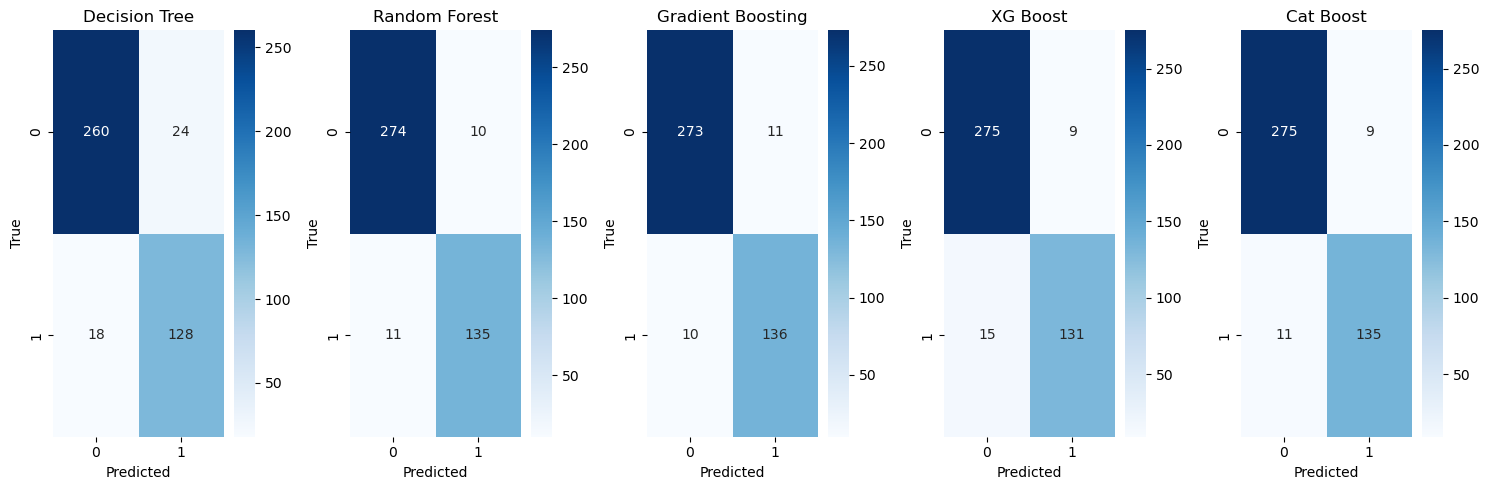

Accuracy Scores:
                Model  Accuracy
0      Decision Tree  0.902326
1      Random Forest  0.951163
2  Gradient Boosting  0.951163
3           XG Boost  0.944186
4          Cat Boost  0.953488

Classification Report for Decision Tree:

              precision    recall  f1-score     support
0              0.935252  0.915493  0.925267  284.000000
1              0.842105  0.876712  0.859060  146.000000
accuracy       0.902326  0.902326  0.902326    0.902326
macro avg      0.888679  0.896103  0.892164  430.000000
weighted avg   0.903625  0.902326  0.902787  430.000000

Classification Report for Random Forest:

              precision    recall  f1-score     support
0              0.961404  0.964789  0.963093  284.000000
1              0.931034  0.924658  0.927835  146.000000
accuracy       0.951163  0.951163  0.951163    0.951163
macro avg      0.946219  0.944723  0.945464  430.000000
weighted avg   0.951092  0.951163  0.951122  430.000000

Classification Report for Gradient Bo

In [61]:
# TOP 10 FEATURES
# Initialize models
models = {
    "Decision Tree": tree.DecisionTreeClassifier(random_state=5),
    "Random Forest": RandomForestClassifier(n_estimators = 500, random_state=5),
    "Gradient Boosting": GradientBoostingClassifier(random_state=5),
    "XG Boost": XGBClassifier(random_state=5),
    "Cat Boost": CatBoostClassifier(random_state=5)
}

# Create dictionaries to store metrics
confusion_matrices = {}
accuracy_scores = {}
classification_reports = {}

for name, model in models.items():
    # Fit model
    model.fit(X_train_scaled_top10, y_train)
    
    # Predict
    y_pred = model.predict(X_test_scaled_top10)
    
    # Compute metrics
    confusion_matrices[name] = confusion_matrix(y_test, y_pred)
    accuracy_scores[name] = accuracy_score(y_test, y_pred)
    classification_reports[name] = classification_report(y_test, y_pred, output_dict=True)

# Plot confusion matrices
fig, axes = plt.subplots(1, len(models), figsize=(15, 5))
for ax, (name, cm) in zip(axes, confusion_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(name)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

plt.tight_layout()
plt.show()

# Display accuracy scores and classification reports
accuracy_df = pd.DataFrame(accuracy_scores.items(), columns=['Model', 'Accuracy'])
print("Accuracy Scores:\n", accuracy_df)

for model, report in classification_reports.items():
    print(f"\nClassification Report for {model}:\n")
    print(pd.DataFrame(report).transpose())